# MARQUER Matthieu
## Projet 4: Segmentez des clients d'un site e-commerce
 ![alt text](img/logo_olist_d7309b5f20.png "Olist")


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### Modification des options

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
#pd.set_option("display.max_rows", 200)
#pd.set_option("display.max_colwidth", 500)
pd.set_option('display.max_columns', 100)

### Importation des fichiers

In [3]:
# Import csv
customers = pd.read_csv('data/source/olist_customers_dataset.csv') 
geolocation = pd.read_csv('data/source/olist_geolocation_dataset.csv') 
order_items = pd.read_csv('data/source/olist_order_items_dataset.csv') 
order_payments = pd.read_csv('data/source/olist_order_payments_dataset.csv') 
order_reviews = pd.read_csv('data/source/olist_order_reviews_dataset.csv') 
orders = pd.read_csv('data/source/olist_orders_dataset.csv') 
products = pd.read_csv('data/source/olist_products_dataset.csv') 
sellers = pd.read_csv('data/source/olist_sellers_dataset.csv') 
category = pd.read_csv('data/source/product_category_name_translation.csv') 

### 1.0 - customers

In [4]:
# Vue du dataframe
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [5]:
# Nombre de lignes et de colonnes
customers.shape

(99441, 5)

In [6]:
# Résumé
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [7]:
# Types
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
# Nombre de valeur manquantes par colonne
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
# Nombre de valeur differentes par colonne
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

### 1.0 - Vue global: geolocation

In [10]:
# Vue du dataframe
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [11]:
# Nombre de lignes et de colonnes
geolocation.shape

(1000163, 5)

In [12]:
# Résumé
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [13]:
# Types
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [14]:
# Nombre de valeur manquantes par colonne
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [15]:
# Nombre de valeur differentes par colonne
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

### 1.0 - order_items

In [16]:
# Vue du dataframe
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [17]:
# Nombre de lignes et de colonnes
order_items.shape

(112650, 7)

In [18]:
# Résumé
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [19]:
# Types
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [20]:
# Nombre de valeur manquantes par colonne
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
# Nombre de valeur differentes par colonne
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### 1.0 - order_payments

In [22]:
# Vue du dataframe
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [23]:
# Nombre de lignes et de colonnes
order_payments.shape

(103886, 5)

In [24]:
# Résumé
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [25]:
# Types
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [26]:
# Nombre de valeur manquantes par colonne
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
# Nombre de valeur differentes par colonne
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

### 1.0 - order_reviews

In [28]:
# Vue du dataframe
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [29]:
# Nombre de lignes et de colonnes
order_reviews.shape

(99224, 7)

In [30]:
# Résumé
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [31]:
# Types
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [32]:
# Nombre de valeur manquantes par colonne
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

<AxesSubplot:>

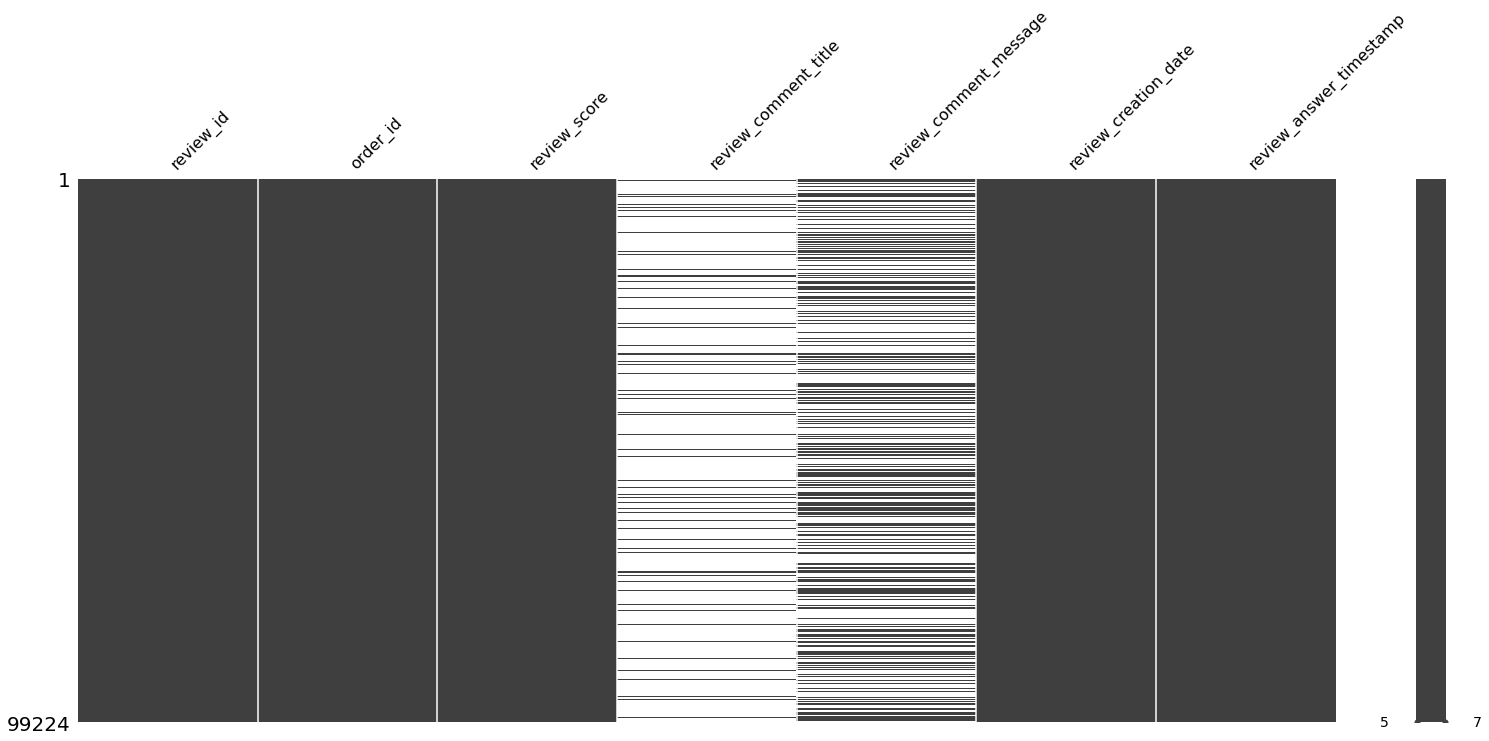

In [33]:
# Visuel des nan
msno.matrix(order_reviews)

In [34]:
# Nombre de valeur differentes par colonne
order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

### 1.0 - orders

In [35]:
# Vue du dataframe
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [36]:
# Nombre de lignes et de colonnes
orders.shape

(99441, 8)

In [37]:
# Résumé
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [38]:
# Types
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [39]:
# Nombre de valeur manquantes par colonne
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

<AxesSubplot:>

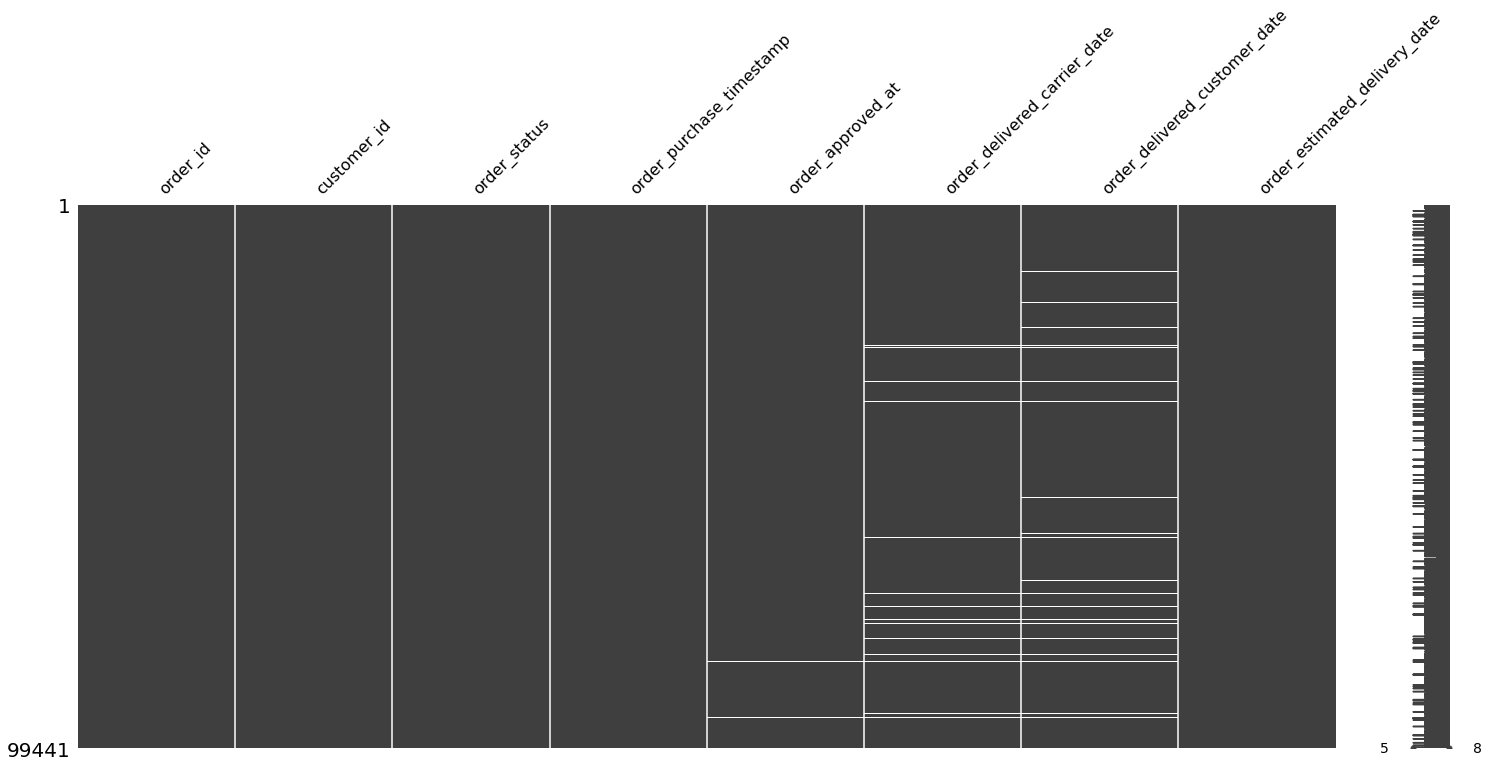

In [40]:
# Visuel des nan
msno.matrix(orders)

In [41]:
# Nombre de valeur differentes par colonne
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [42]:
# Modification du type en: datetime64
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format="%Y-%m-%d")
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format="%Y-%m-%d")
# Récupération sur la date d'achat de commande de year_month
orders["year_month"] = orders["order_purchase_timestamp"].dt.strftime("%Y-%m")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01


### 1.0 - products

In [43]:
# Vue du dataframe
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [44]:
# Nombre de lignes et de colonnes
products.shape

(32951, 9)

In [45]:
# Résumé
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [46]:
# Types
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [47]:
# Nombre de valeur manquantes par colonne
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

<AxesSubplot:>

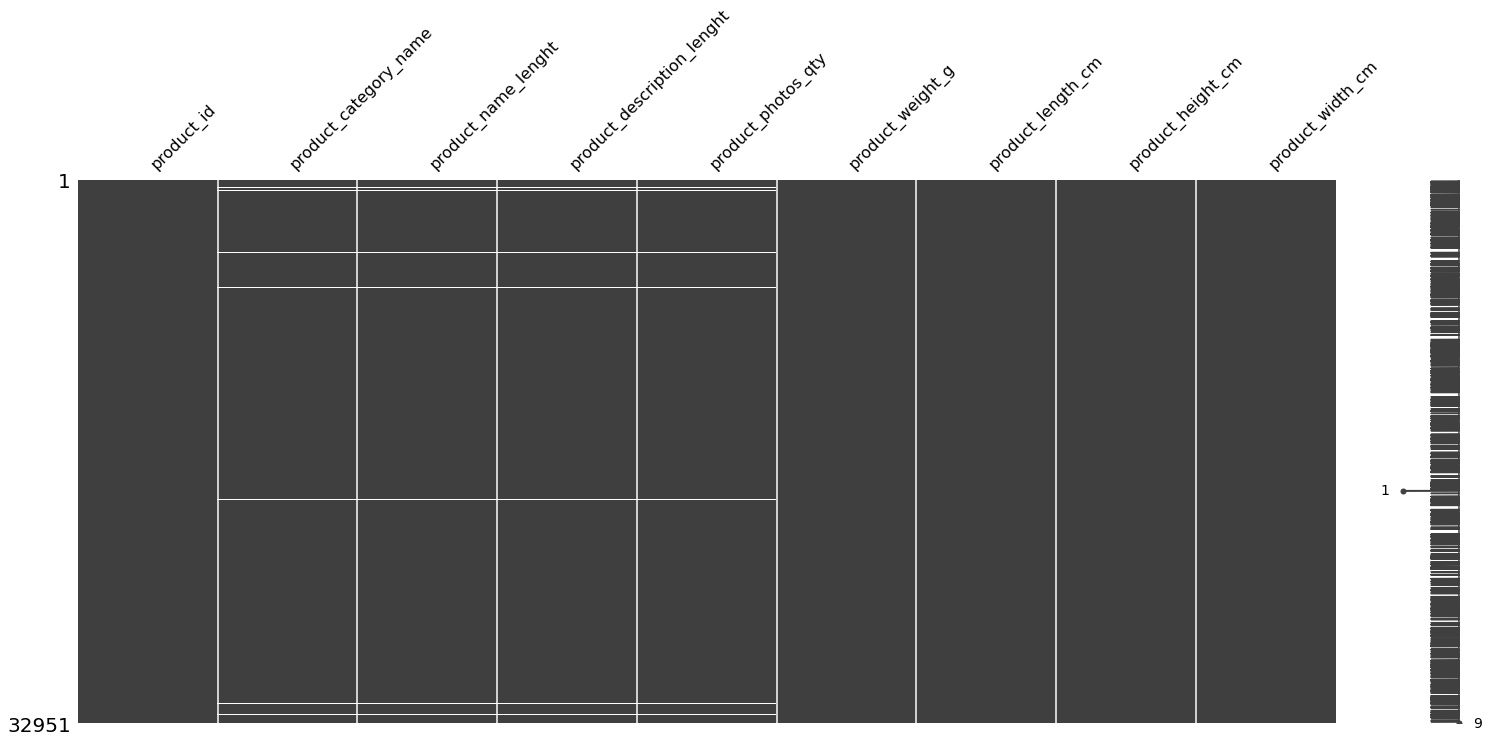

In [48]:
# Visuel des nan
msno.matrix(products)

In [49]:
# Nombre de valeur differentes par colonne
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

### 1.0 - sellers

In [50]:
# Vue du dataframe
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [51]:
# Nombre de lignes et de colonnes
sellers.shape

(3095, 4)

In [52]:
# Résumé
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [53]:
# Types
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [54]:
# Nombre de valeur manquantes par colonne
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [55]:
# Nombre de valeur differentes par colonne
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### 1.0 - category

In [56]:
# Vue du dataframe
category.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [57]:
# Nombre de lignes et de colonnes
category.shape

(71, 2)

In [58]:
# Résumé
category.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [59]:
# Types
category.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [60]:
# Nombre de valeur manquantes par colonne
category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [61]:
# Nombre de valeur differentes par colonne
category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

### Rename

In [62]:
# Geolocation
geolocation = geolocation.rename(columns = {"geolocation_zip_code_prefix": "zip_code",
                                           "geolocation_city": "city",
                                           "geolocation_state": "state"})

# Customers
customers = customers.rename(columns = {"customer_zip_code_prefix": "zip_code",
                                       "customer_city": "city",
                                       "customer_state": "state"})

# Sellers
sellers = sellers.rename(columns = {"seller_zip_code_prefix": "zip_code",
                                   "seller_city": "city",
                                   "seller_state": "state"})

### Répartition des statuts de commande

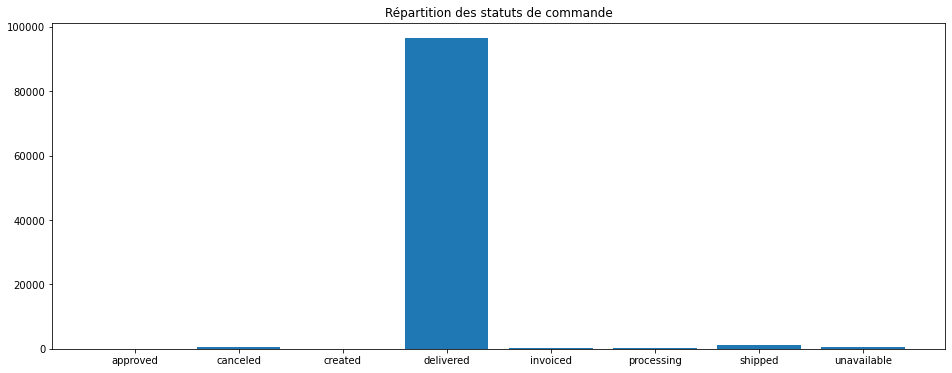

In [63]:
# Ajout d'un counter
orders["counter"] = 1

# Répartition des statuts de commande
statut_order = orders.groupby("order_status")["counter"].sum().reset_index()

# Graphique
plt.figure(figsize=(16, 6))
plt.title("Répartition des statuts de commande")
plt.bar(statut_order["order_status"], statut_order["counter"])
plt.show()

In [64]:
# Garde seulement les lignes ou order_delivered_customer_date est notna
orders = orders.loc[orders["order_delivered_customer_date"].notna()]

# calcul delais de livraison # date achat: order_purchase_timestamp # date livraison: order_delivered_customer_date
orders["temps_livraison"] = orders.order_delivered_customer_date - orders.order_purchase_timestamp

# Types en str
orders["temps_livraison"] = orders["temps_livraison"].astype(str)

# Garde les jours et supprime Heure, minutes, seconde
orders["temps_livraison"] = orders["temps_livraison"].str.split(" ").str[0]

# Remodification du type
orders["temps_livraison"] = orders["temps_livraison"].astype(int)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,counter,temps_livraison
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,1,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,1,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,1,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,1,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,1,2
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03,1,8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02,1,22
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-08,1,24
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01,1,17


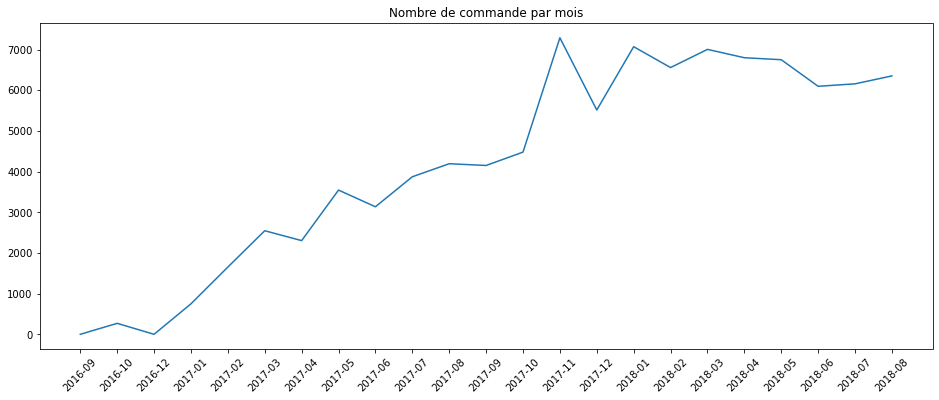

In [65]:
# Nombre de commande en fonction du temps
nb_commande = orders.groupby("year_month")["counter"].sum()

# Graphique
plt.figure(figsize=(16,  6))
plt.plot(nb_commande)
plt.title("Nombre de commande par mois")
plt.xticks(rotation=45)
plt.show()

In [66]:
# Suppression des commandes avant 2016-12 et apres 2018-08
orders = orders.loc[orders["order_purchase_timestamp"] >= "2016-11"]
orders = orders.loc[orders["order_purchase_timestamp"] <= "2018-09"]
orders.shape

(96205, 11)

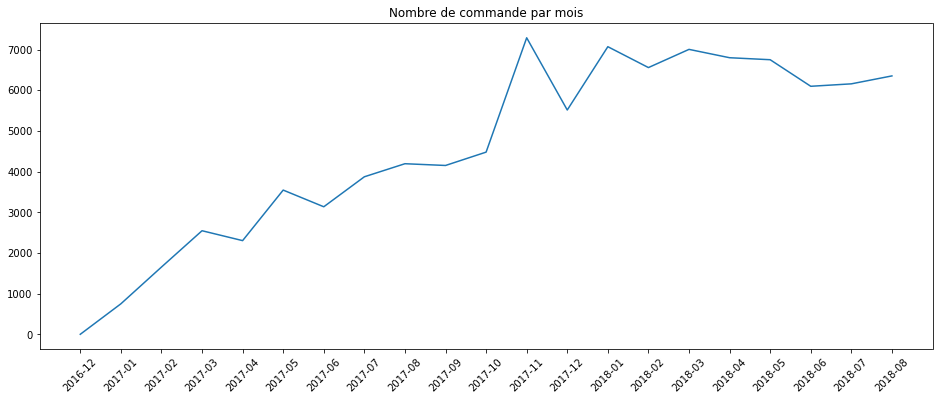

In [67]:
# Nombre de commande en fonction du temps
nb_commande = orders.groupby("year_month")["counter"].sum()

# Graphique
plt.figure(figsize=(16,  6))
plt.plot(nb_commande)
plt.title("Nombre de commande par mois")
plt.xticks(rotation=45)
plt.show()

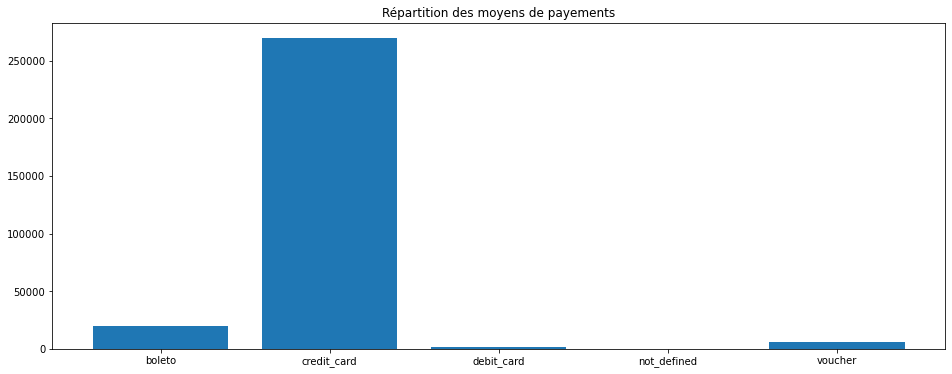

In [68]:
# Répartition des moyens de payements
moyen_paiements = order_payments.groupby("payment_type")["payment_installments"].sum().reset_index()

# Graphique
plt.figure(figsize=(16, 6))
plt.title("Répartition des moyens de payements")
plt.bar(moyen_paiements["payment_type"],moyen_paiements["payment_installments"])
plt.show()

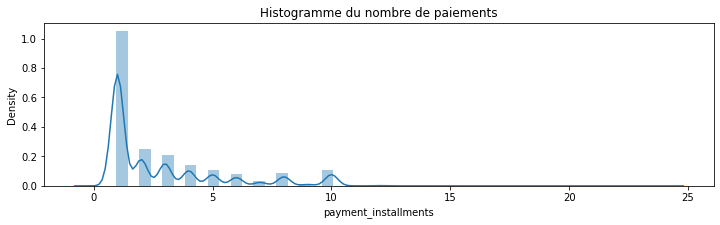

In [69]:
# Histogramme du nombre de paiements
plt.figure(figsize=(12, 3))
plt.title("Histogramme du nombre de paiements")
sns.distplot(order_payments["payment_installments"])
plt.show()

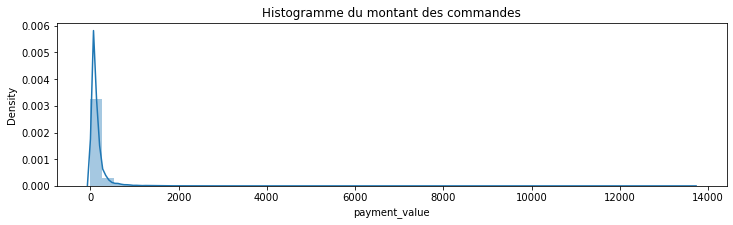

In [70]:
# Histogramme du montant des commandes
plt.figure(figsize=(12, 3))
plt.title("Histogramme du montant des commandes")
sns.distplot(order_payments["payment_value"])
plt.show()

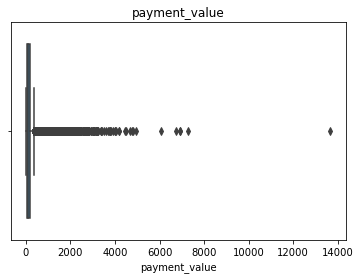

In [71]:
# Boxplot de payment_value
plt.title("payment_value")
sns.boxplot(order_payments["payment_value"])
plt.show()

In [72]:
# Affichage des payment_value supérieur à 6000
order_payments.loc[order_payments["payment_value"] >  6000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
62409,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


In [73]:
# Suppression d'outliers
order_payments = order_payments.loc[order_payments["payment_value"] < 8000]

In [74]:
# Liste des statuts d'achat
orders.order_status.value_counts()

delivered    96204
canceled         1
Name: order_status, dtype: int64

In [75]:
# Garde seulement les commandes livrées
orders = orders.loc[orders["order_status"].isin(["delivered"]),:]
# Vérification 
orders.order_status.value_counts()

delivered    96204
Name: order_status, dtype: int64

In [76]:
# Nombre de paiement
order_payments.payment_installments.value_counts()

1     52545
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [77]:
# Nombre de client total
customers.shape[0]

99441

# Jointure des tables

In [78]:
# merge orders 
oc = pd.merge(orders, customers, on = 'customer_id', how = 'left', indicator=True)
oc.shape

(96204, 16)

In [79]:
# Nombre de client sans commande
customers.shape[0]-oc.shape[0]

3237

In [80]:
# order left
oc.loc[oc['_merge'] == 'left_only']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,counter,temps_livraison,customer_unique_id,zip_code,city,state,_merge


In [81]:
# order right
oc.loc[oc['_merge'] == 'right_only']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,counter,temps_livraison,customer_unique_id,zip_code,city,state,_merge


In [82]:
# order both
oc.loc[oc['_merge'] == 'both'].shape

(96204, 16)

In [83]:
# Drop '_merge'
oc = oc.drop(columns='_merge')

In [84]:
# merge ocp 
ocp = pd.merge(oc, order_payments, on = 'order_id', how = 'left', indicator=True)
ocp.shape

(100466, 20)

In [85]:
# order left
ocp.loc[ocp['_merge'] == 'left_only']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,counter,temps_livraison,customer_unique_id,zip_code,city,state,payment_sequential,payment_type,payment_installments,payment_value,_merge
13537,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,2017-09,1,18,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,NaN,NaN,NaN,NaN,left_only


In [86]:
# order right
ocp.loc[ocp['_merge'] == 'right_only'].shape

(0, 20)

In [87]:
# order both
ocp = ocp.loc[ocp['_merge'] == 'both']

In [88]:
# Drop '_merge'
ocp = ocp.drop(columns='_merge')

In [89]:
# merge ocpi 
ocpi = pd.merge(ocp, order_items, on = 'order_id', how = 'left', indicator=True)
ocpi.shape

(114689, 26)

In [90]:
# order left
ocpi.loc[ocpi['_merge'] == 'left_only'].shape

(0, 26)

In [91]:
# order right
ocpi.loc[ocpi['_merge'] == 'right_only'].shape

(0, 26)

In [92]:
# Drop '_merge'
ocpi = ocpi.drop(columns='_merge')

In [93]:
# merge ocpir 
ocpir = pd.merge(ocpi, order_reviews, on = 'order_id', how = 'left', indicator=True)
ocpir.shape

(115370, 32)

In [94]:
# order left
ocpir.loc[ocpir['_merge'] == 'left_only'].shape

(857, 32)

In [95]:
# order right
ocpir.loc[ocpir['_merge'] == 'right_only'].shape

(0, 32)

In [96]:
# order both
ocpir = ocpir.loc[ocpir['_merge'] == 'both']

In [97]:
# Drop '_merge'
ocpir = ocpir.drop(columns='_merge')

# Heatmap

<AxesSubplot:>

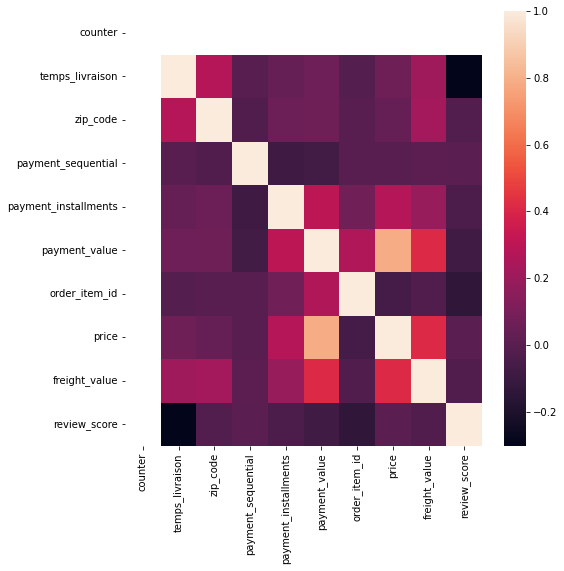

In [98]:
# Heatmap sur ocpir
plt.figure(figsize=(8, 8))
sns.heatmap(ocpir.corr())

# Sauvegarde du DataFrame en CSV

In [99]:
# Sauvegarde du dataframe
ocpir.to_csv('data/cleaned/ocpir.csv', index=False)